In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [3]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterFactoryInterface,
    SegmenterType,
)
from segmenter_api.domain.service.segmenter import Bbox2SegmentInput
from segmenter_api.utils.image import draw_bboxes

In [4]:
segmenter_factory = resolve(SegmenterFactoryInterface)
segmenter = segmenter_factory.create(SegmenterType.SAM2)

{"severity": "INFO", "timestamp": "2025-04-16_04:32:46", "message": "関数SAM2.__init__が開始"}
{"severity": "INFO", "timestamp": "2025-04-16_04:32:46", "message": "\n            downloading 2 files from\n            bucket: segmenter-api\n            "}


  0%|          | 0/2 [00:00<?, ?it/s]

{"severity": "INFO", "timestamp": "2025-04-16_04:32:50", "message": "関数SAM2.__init__は3.7103secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.__init__は3.7103secで処理を完了


In [13]:
image_path = Path("tests/data/abema_water.png")
image = Image.open(image_path).convert("RGBA")
bboxes = [
    [252.416015625, 186.8800048828125, 518.656005859375, 740.864013671875],
    [295.42401123046875, 542.2080078125, 501.2480163574219, 733.696044921875],
]

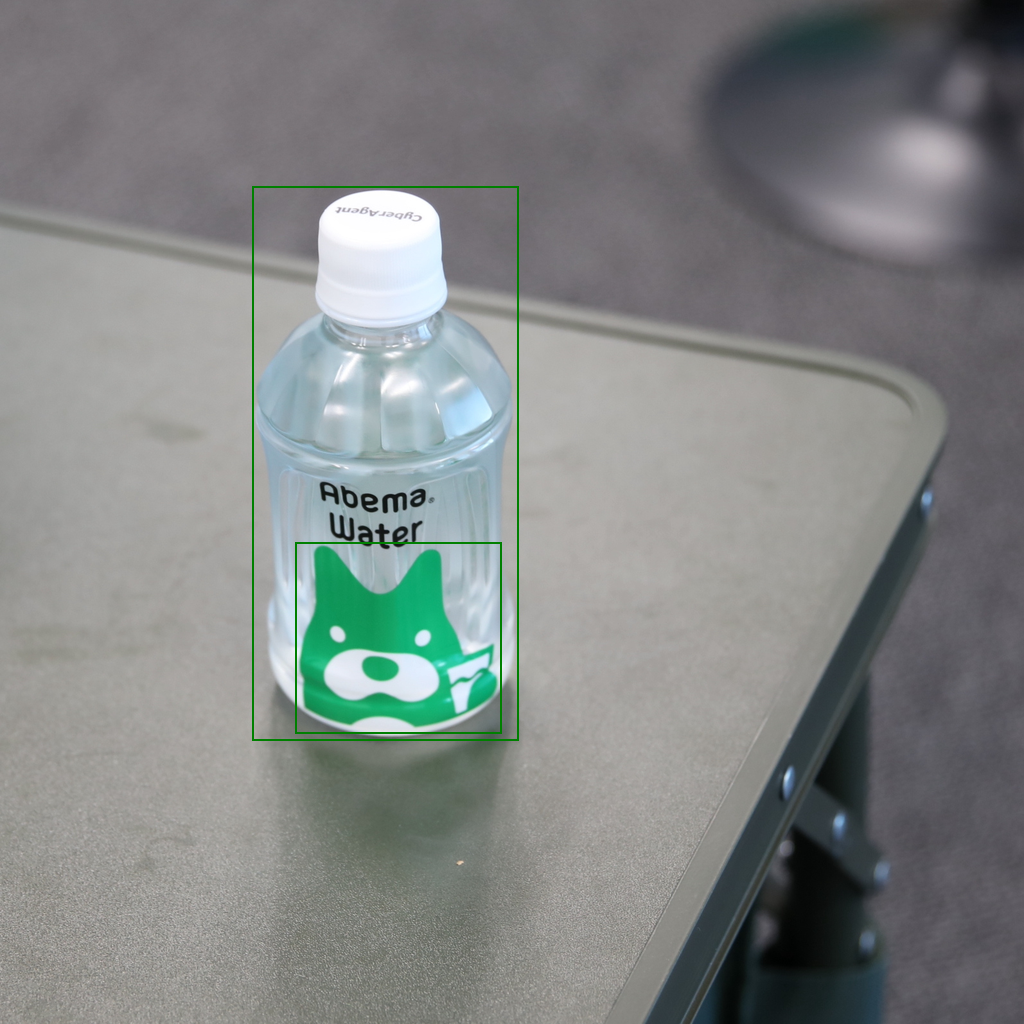

In [6]:
draw_bboxes(image=image, bboxes=bboxes)

In [7]:
bbox2segment_output = segmenter.bbox2segment(
    bbox2segment_input=Bbox2SegmentInput(
        image=image,
        bboxes=bboxes,
    )
)

{"severity": "INFO", "timestamp": "2025-04-16_04:32:59", "message": "関数SAM2.bbox2segmentが開始"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-16_04:32:59", "message": "関数SAM2.bbox2segmentは0.5208secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentは0.5208secで処理を完了


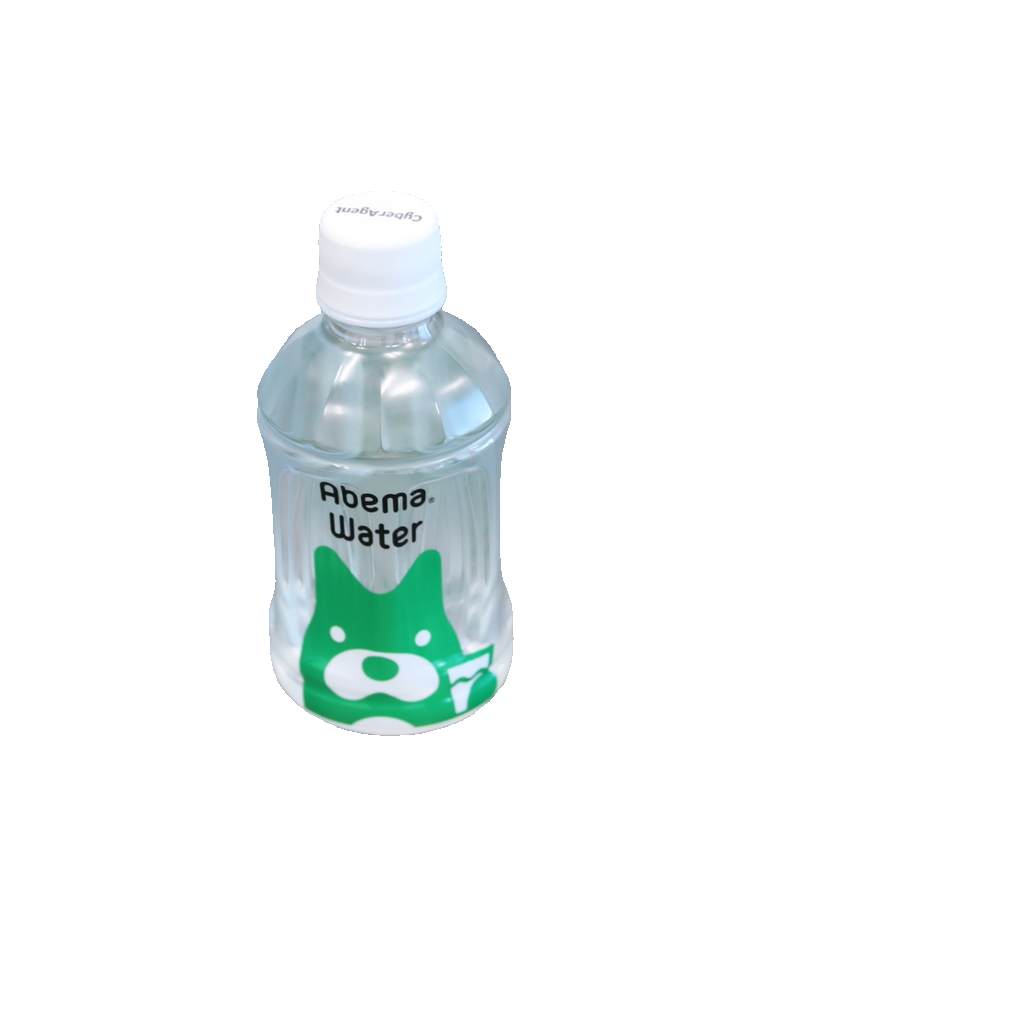

In [16]:
bottle_image = image.convert("RGBA")
bottle_image.putalpha(bbox2segment_output.masks[0])
bottle_image

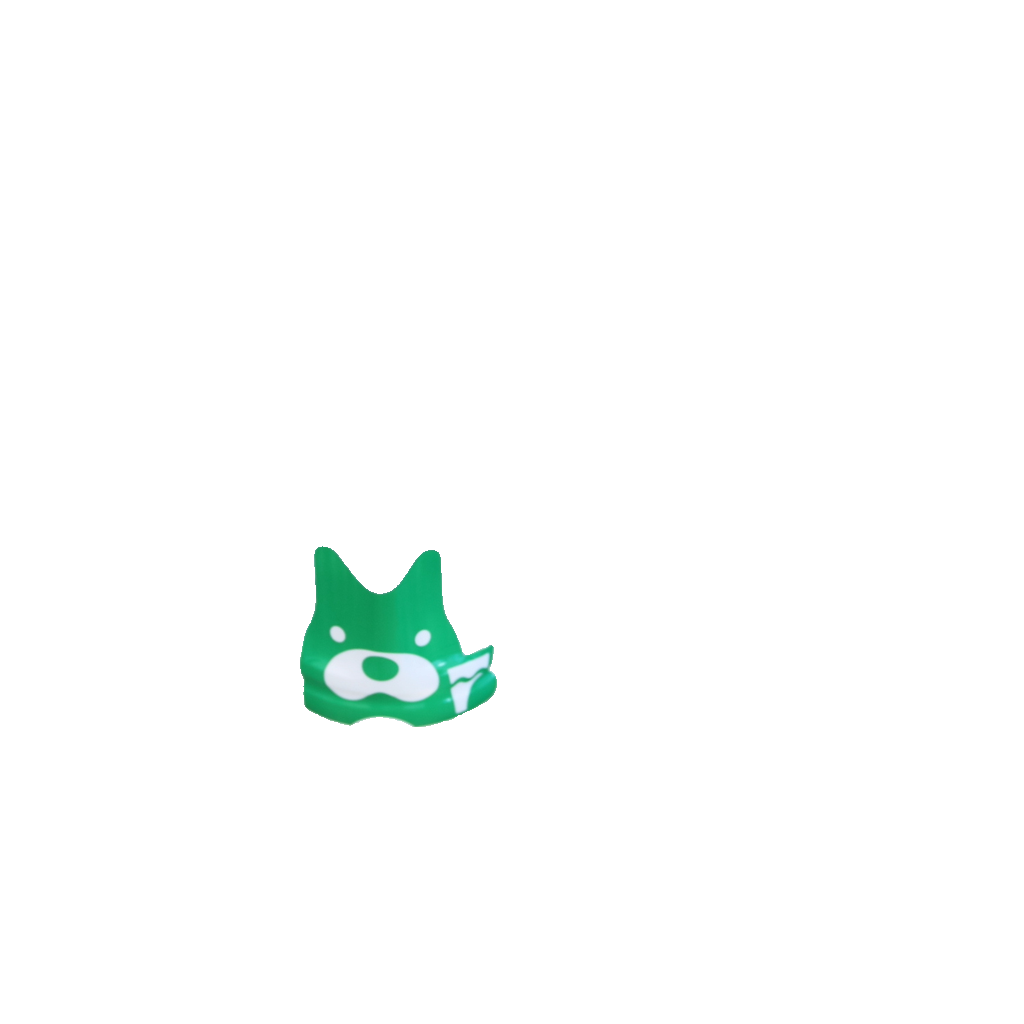

In [15]:
character_image = image.convert("RGBA")
character_image.putalpha(bbox2segment_output.masks[1])
character_image